<a href="https://colab.research.google.com/github/Shazebgk/BikeSharing_IIIT_assignment/blob/main/Notebook_Bikesharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/sample_data/BikeAssignment/BikeAssignementData.csv')

# Drop 'casual' columns and 'registered' (not features)
df = df.drop(['casual', 'registered'], axis=1)

# Map categorical values based on the data dictionary
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
# Update the 'season' and 'weathersit' columns with categorical values
df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

# Create dummy variables for categorical columns with more than 2 categories
categorical_cols = ['season', 'weathersit']  # Add other categorical columns as needed
for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

# Display the modified DataFrame
print(df.head())

   instant      dteday  yr  mnth  holiday  weekday  workingday       temp  \
0        1  01-01-2018   0     1        0        6           0  14.110847   
1        2  02-01-2018   0     1        0        0           0  14.902598   
2        3  03-01-2018   0     1        0        1           1   8.050924   
3        4  04-01-2018   0     1        0        2           1   8.200000   
4        5  05-01-2018   0     1        0        3           1   9.305237   

      atemp      hum  windspeed   cnt  season_Spring  season_Summer  \
0  18.18125  80.5833  10.749882   985              1              0   
1  17.68695  69.6087  16.652113   801              1              0   
2   9.47025  43.7273  16.636703  1349              1              0   
3  10.60610  59.0435  10.739832  1562              1              0   
4  11.46350  43.6957  12.522300  1600              1              0   

   season_Winter  weathersit_Light Rain  weathersit_Mist  
0              0                      0            

Summary Statistics:
           instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std   

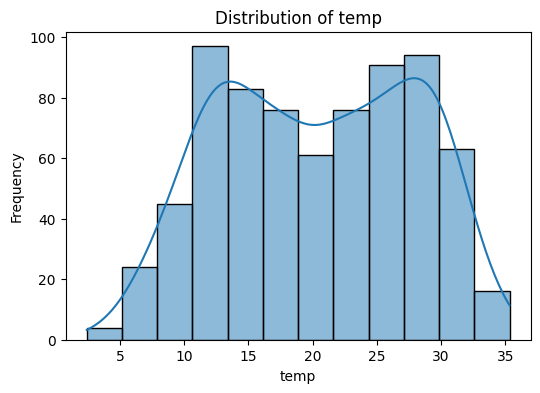

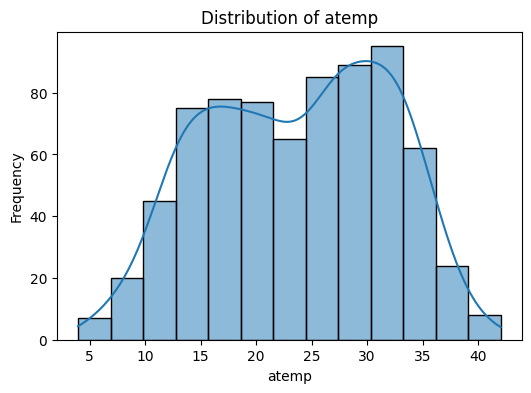

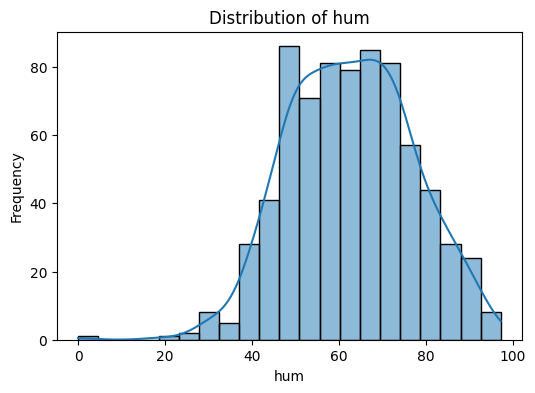

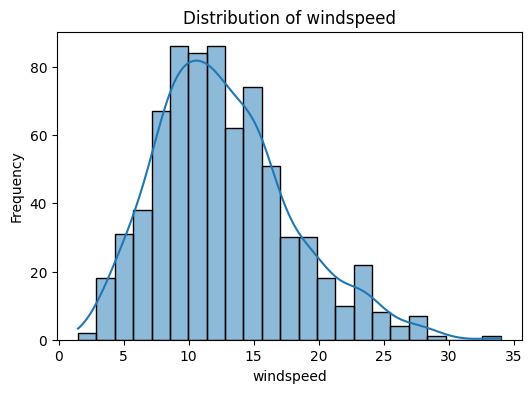

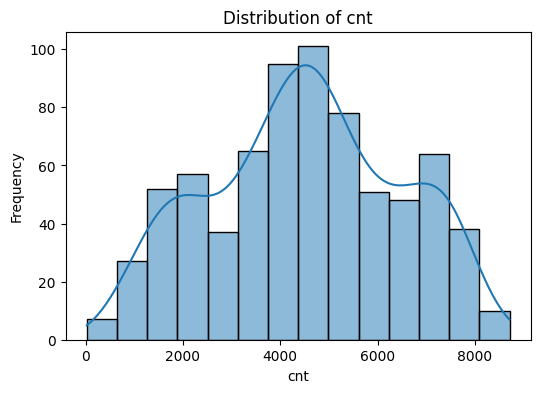

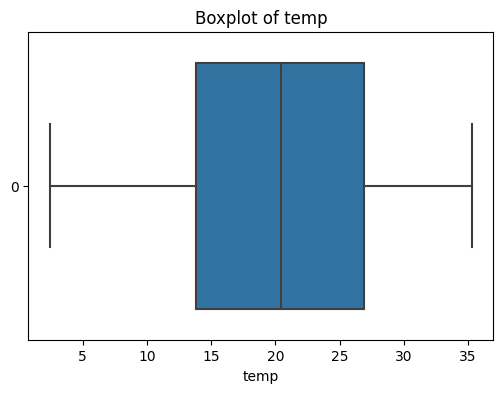

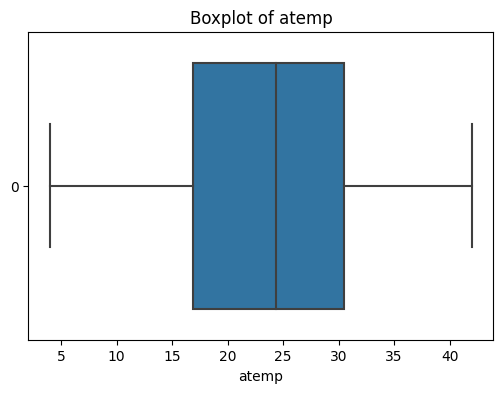

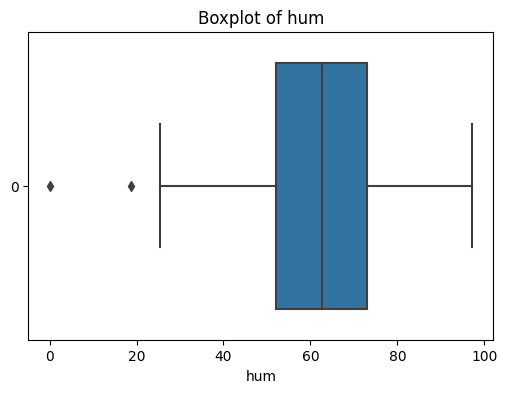

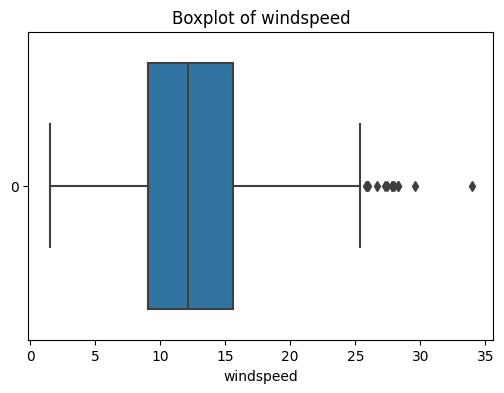

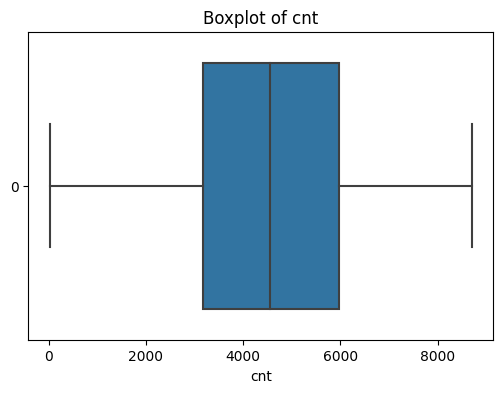

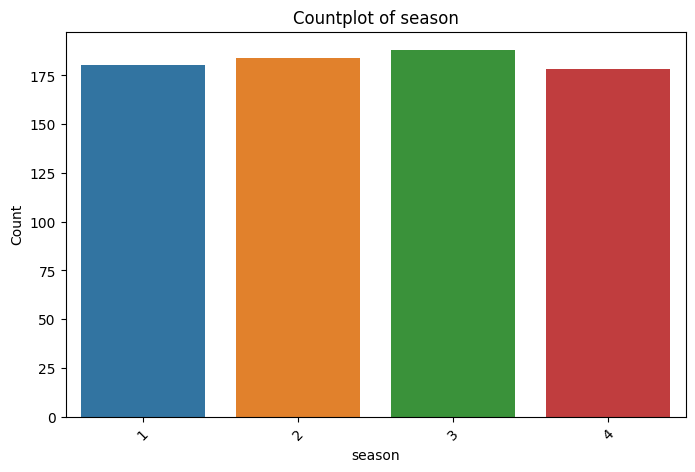

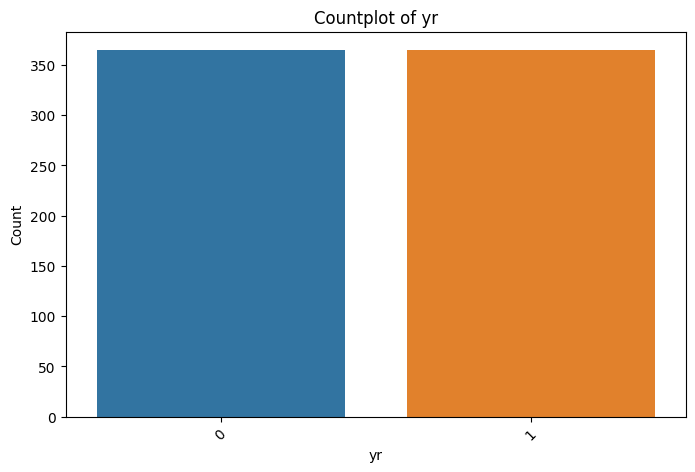

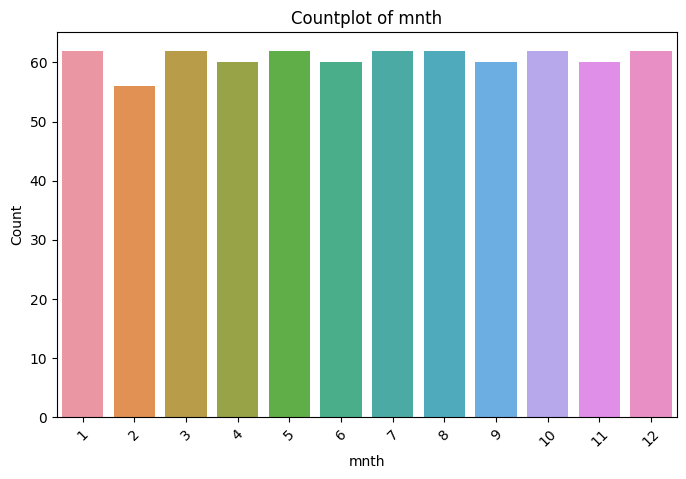

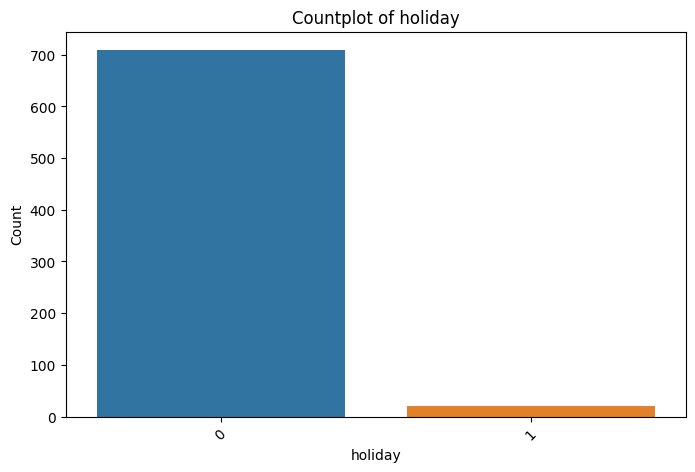

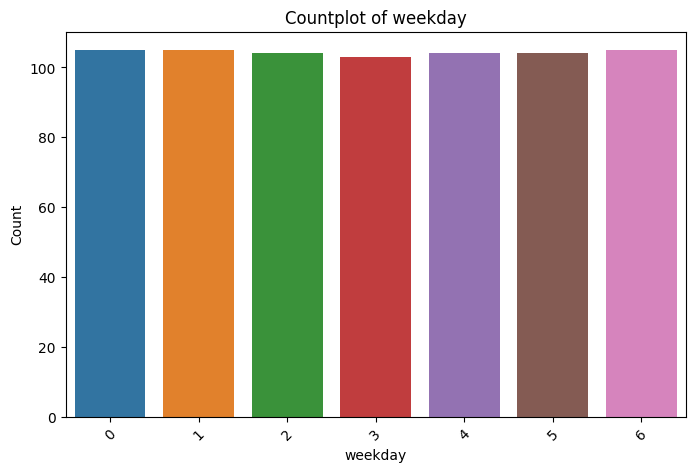

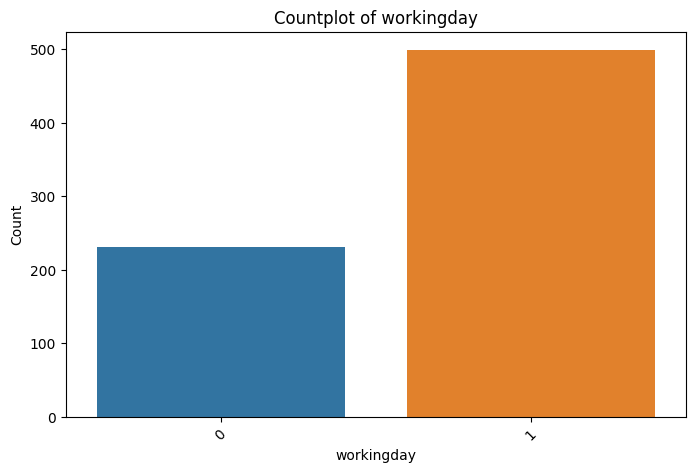

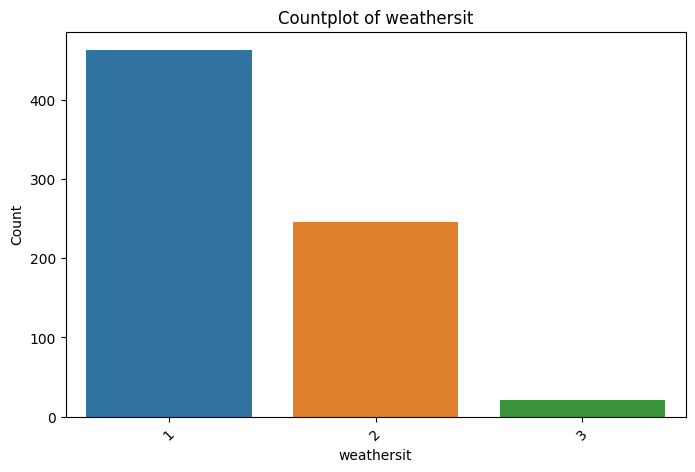

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/sample_data/BikeAssignment/BikeAssignementData.csv')

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Check data distribution using histograms for numerical variables
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']  # Adjust columns as needed
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col], orient='h')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Count plots for categorical variables
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # Add categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


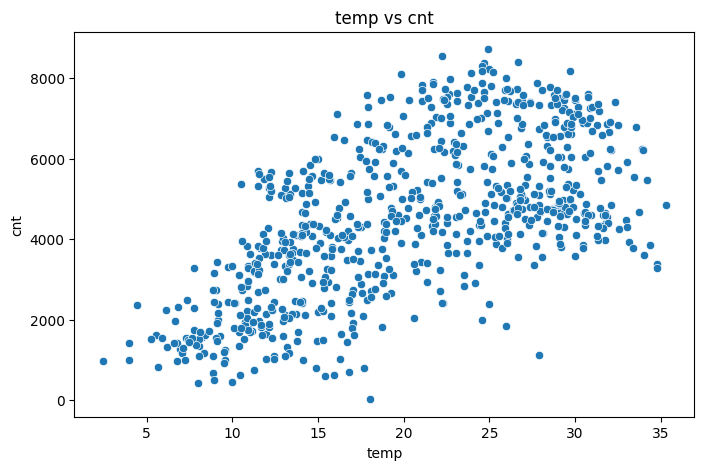

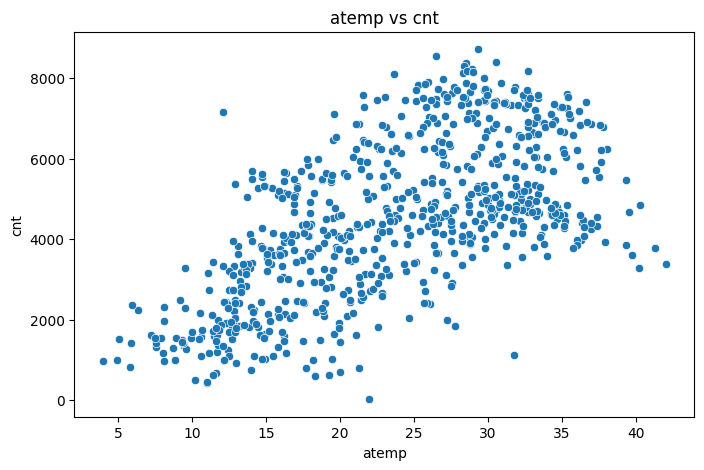

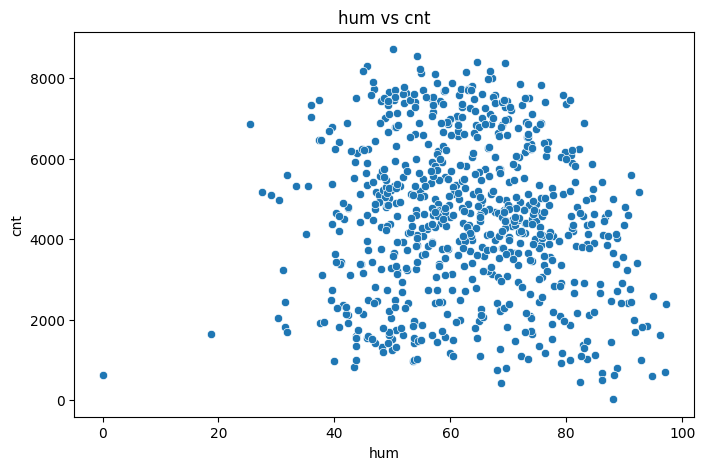

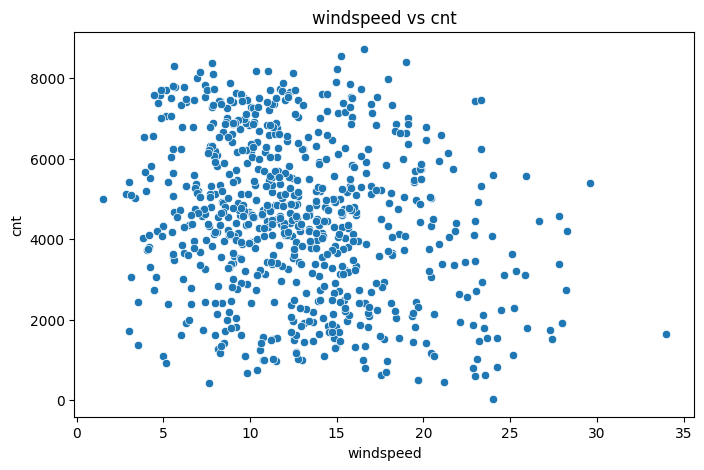

<ipython-input-4-9aeb0c4daee0>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


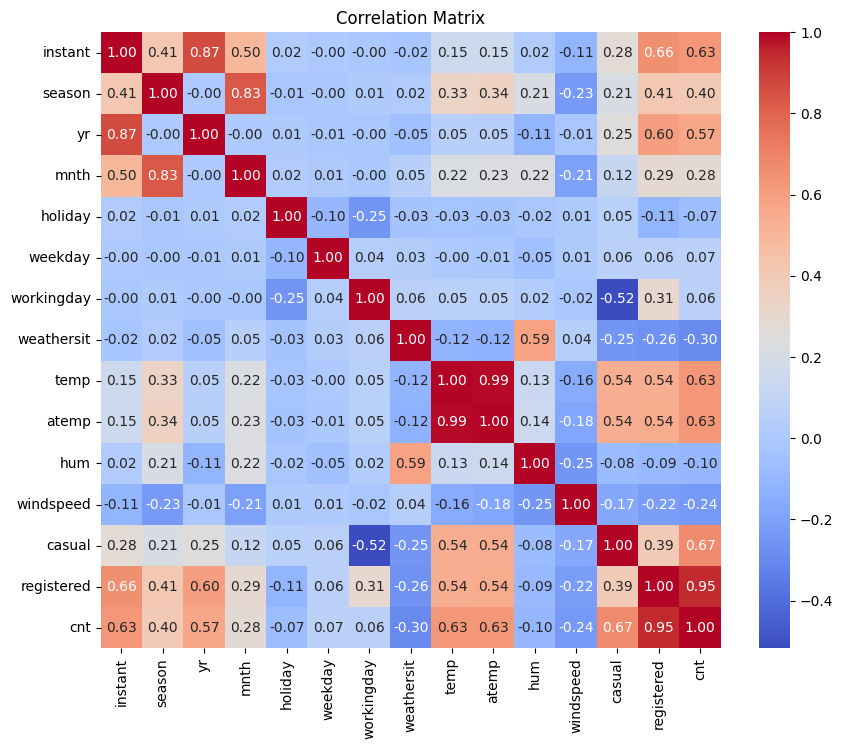

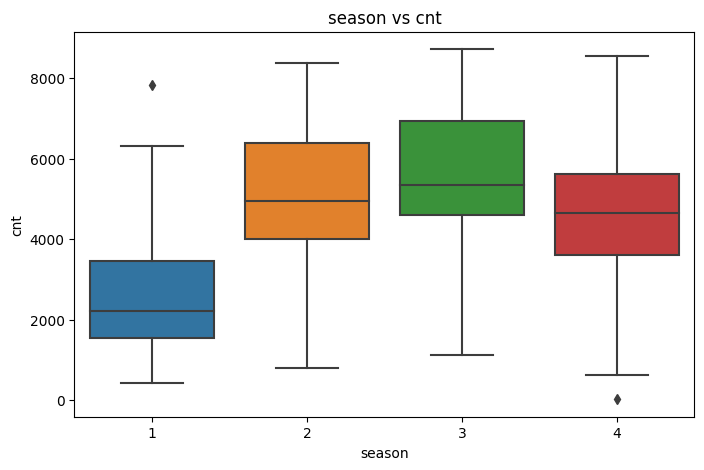

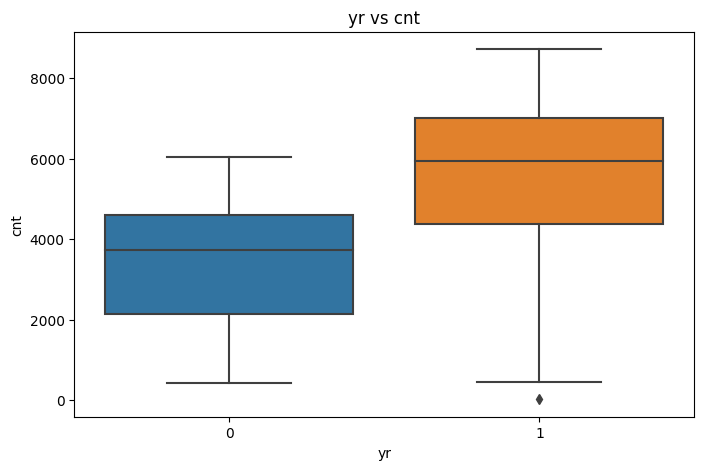

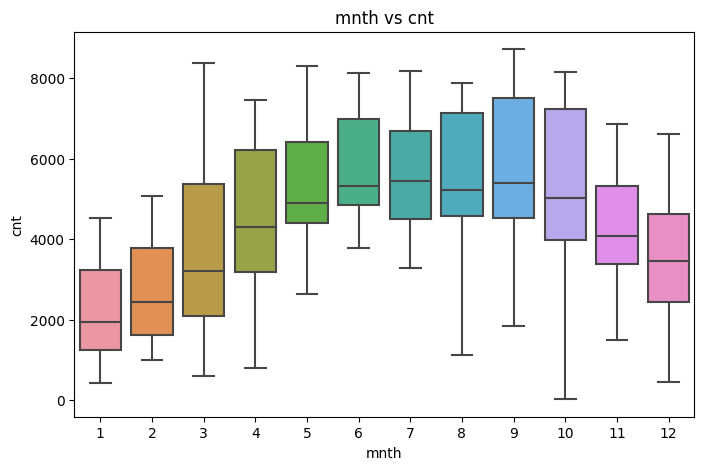

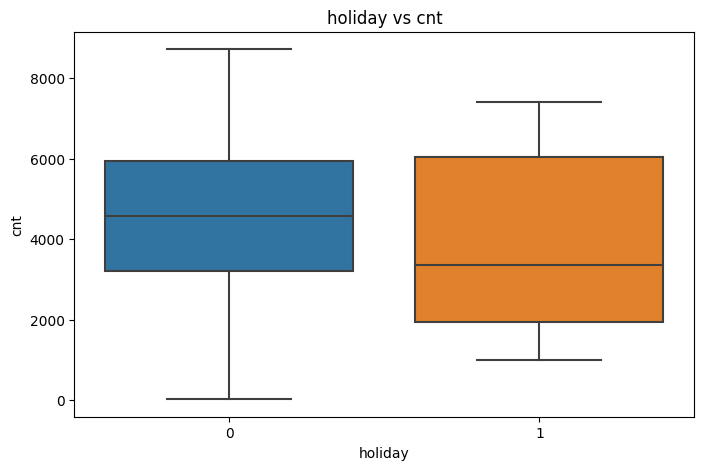

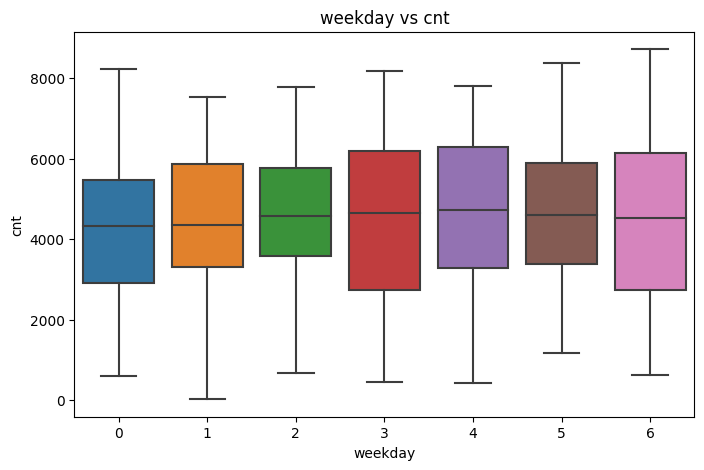

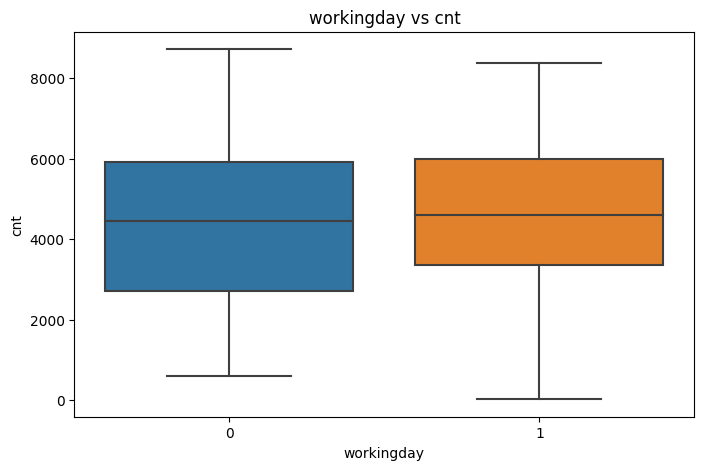

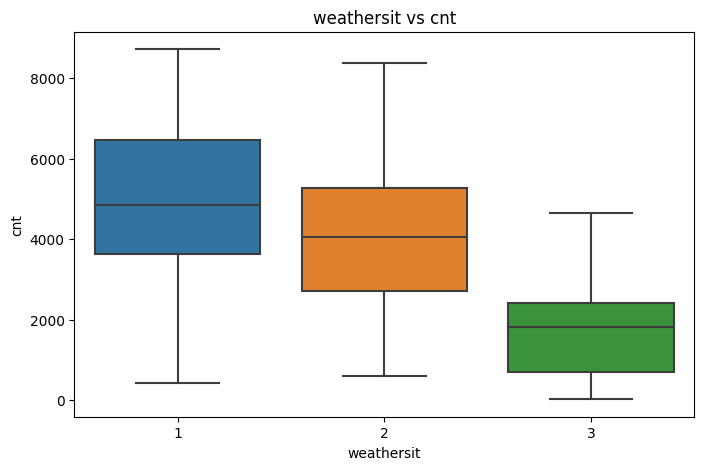

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/sample_data/BikeAssignment/BikeAssignementData.csv')

# Scatter plots for numerical variables vs. target variable
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']  # Adjust columns as needed
target_variable = 'cnt'  # Replace with your target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target_variable)
    plt.title(f'{col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

# Correlation matrix for numerical variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for categorical variables vs. target variable
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # Add categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y=target_variable)
    plt.title(f'{col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()


In [ ]:
import pandas as pd

# Load your dataset
file_path = '/content/sample_data/BikeAssignment/BikeAssignementData.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Define features and target variable
X = df.drop(['cnt'], axis=1)  # Features
y = df['cnt']  # Target variable

# Splitting the data into training and testing sets (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Training set shape - Features: ", X_train.shape, " Target: ", y_train.shape)
print("Testing set shape - Features: ", X_test.shape, " Target: ", y_test.shape)


Training set shape - Features:  (584, 15)  Target:  (584,)
Testing set shape - Features:  (146, 15)  Target:  (146,)


In [ ]:
# Import necessary libraries
import pandas as pd


# Load your dataset into a DataFrame
file_path = '/content/sample_data/BikeAssignment/BikeAssignementData.csv'
data = pd.read_csv(file_path)

# Assuming 'cnt' is the target variable
X = data.drop(['cnt'], axis=1)  # Features
y = data['cnt']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (584, 15)
X_test shape: (146, 15)
y_train shape: (584,)
y_test shape: (146,)


In [ ]:


# Assuming X_train contains your features
# Drop non-numeric columns or columns with non-numeric data
numeric_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
X_train_numeric = X_train[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Display the scaled features (X_train_scaled)
print("Scaled features (X_train_scaled):")
print(X_train_scaled)

Scaled features (X_train_scaled):
[[ 0.41132063 -1.02426696  0.70319848 ...  0.35214862  0.551656
  -0.99599995]
 [ 1.31777817 -1.02426696  1.57882303 ... -1.14413107 -0.86377542
  -0.00990124]
 [ 1.31777817  0.97630797  1.57882303 ... -0.16335958 -0.44996644
   1.49933011]
 ...
 [ 1.31777817 -1.02426696  0.70319848 ... -0.50420692 -0.55378424
  -0.16506771]
 [-1.40159445  0.97630797 -1.04805061 ...  0.28554304 -0.03030857
   0.48916477]
 [-0.49513691 -1.02426696 -0.75617576 ...  0.85902202 -0.95004655
  -1.09859981]]


In [ ]:
# Assuming X_test contains your test features
# Select the same numeric columns as used in training
X_test_numeric = X_test[numeric_columns]

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_numeric)

# Display the scaled test features (X_test_scaled)
print("Scaled test features (X_test_scaled):")
print(X_test_scaled)


Scaled test features (X_test_scaled):
[[-0.49513691  0.97630797 -0.75617576 ...  0.06103826  2.83126094
   0.61899793]
 [-0.49513691 -1.02426696 -0.46430092 ...  0.36874989  2.18788302
  -0.79460021]
 [ 1.31777817 -1.02426696  0.99507333 ... -0.13010358  0.03841589
  -0.78636689]
 ...
 [ 0.41132063 -1.02426696  0.41132363 ...  0.20232282  0.6423138
  -0.76040026]
 [-0.49513691 -1.02426696 -0.46430092 ... -0.79503657 -0.12535303
  -0.31833417]
 [ 0.41132063 -1.02426696  0.70319848 ... -0.10516157  0.72273604
  -0.48553395]]


In [ ]:
# Assuming X_train_scaled contains your scaled training features and y_train contains your target variable

# Initialize a linear regression model
model = LinearRegression()

# Initialize Recursive Feature Elimination (RFE) with the linear regression model
selector = RFE(model, n_features_to_select=5)  # Set n_features_to_select to desired number of features

# Fit RFE on the training data
selector = selector.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_features_indices]

# Display the selected features
print("Selected Features:")
print(selected_features)

# Calculate VIF for the selected features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train[selected_features].columns
vif_data["VIF"] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(len(selected_features))]

# Filter features based on VIF cutoff (e.g., 5)
selected_features_vif = vif_data[vif_data['VIF'] < 5]['Feature']

# Display the features selected based on VIF cutoff
print("\nSelected Features based on VIF < 5:")
print(selected_features_vif)



Selected Features:
Index(['weekday', 'workingday', 'weathersit', 'hum', 'windspeed'], dtype='object')

Selected Features based on VIF < 5:
0       weekday
1    workingday
Name: Feature, dtype: object


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset (replace 'data.csv' with your file path)
data = pd.read_csv('/content/sample_data/BikeAssignment/BikeAssignementData.csv')

# Exclude non-numeric columns from remaining_features
non_numeric_columns = ['dteday']  # Include other non-numeric column names if needed
remaining_features = [col for col in data.columns if col not in non_numeric_columns]

# ... (other preprocessing steps)

# Define a function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Feature selection loop based on p-value and VIF
while True:
    X = sm.add_constant(data[remaining_features].astype(float))  # Convert numeric columns to float
    y = data['cnt'].astype(float)  # Convert target variable to float
    model = sm.OLS(y, X).fit()

    # Get p-values for each feature
    p_values = model.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()  # Get the maximum p-value

    # Get VIF for each feature if there are features left
    if len(remaining_features) > 0:
        vif_data = calculate_vif(X.drop('const', axis=1))
        max_vif = vif_data['VIF'].max()  # Get the maximum VIF value
    else:
        max_vif = 0  # Set max VIF to 0 if no features left

    # If both maximum p-value and maximum VIF are below their respective thresholds, break the loop
    if max_p_value < 0.05 and max_vif < 5:
        break

    # Drop the feature with the highest p-value or VIF if above thresholds
    if max_p_value > max_vif:
        feature_to_drop = p_values.idxmax()
    else:
        feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].iloc[0]

    remaining_features.remove(feature_to_drop)

# Get the final selected features
selected_features = remaining_features

print("Selected Features:", selected_features)







/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Selected Features: ['yr', 'holiday', 'weekday']


In [ ]:
# Necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = '/content/sample_data/BikeAssignment/BikeAssignementData.csv'
data = pd.read_csv(file_path)

# Scale the numeric features using StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train[numeric_cols]
X_test_scaled = X_test[numeric_cols]
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns=numeric_cols)

# Concatenate scaled numeric columns with other columns
X_train_final = pd.concat([X_train_scaled, X_train[other_cols], X_train[date_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test[other_cols], X_test[date_cols]], axis=1)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_final)

# Calculate R-squared score for test data
r2_test = r2_score(y_test, y_pred)
print("R-squared (R2) score for test data:", r2_test)


TypeError: ignored